In [1080]:
import json
import os
import requests
from player import Player
import pandas as pd
import json
import pymongo
from pymongo import MongoClient
import base64
from pprint import pprint
import numpy as np
import seaborn as sns
# importing statistics module 
from statistics import mean
import matplotlib.pyplot as plt
import itertools
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
print(pymongo.__version__)

3.9.0


In [126]:
client = MongoClient('localhost', 27017)
db = client['faceit_db']
collection_players = db['players']
collection_matches = db['matches']

In [127]:
def get_collection_len(coll):
    cursor = coll.find({})
    i=0
    for document in cursor:
        i+=1
    print(i)

In [1110]:
get_collection_len(collection_players)
get_collection_len(collection_matches)

162743
49242


In [911]:
data_players = pd.DataFrame(list(collection_players.find()))

In [925]:
data = pd.DataFrame(list(collection_matches.find()))

In [927]:
data = data[data['previous_five']=='ok']
data.shape

(224, 10)

In [919]:
data = data[data['previous_five'].notnull()]


In [926]:
data_stored = data.copy(deep=True)

In [273]:
data_stored.shape

(34252, 10)

In [541]:
data = data.head(1000)

In [260]:
data.head()

,_id,match_id,team1,team2,start_time,map,parties,winner,scoreboard,previous_five,players_ids_all,any_player_banned
0,5defd34c44fe901565fe77f3,1-427cfc7e-579a-4d9f-8fbc-f31066d85992,[{'id': '7565eb27-bb23-404e-b89b-f96e3c1c9971'...,[{'id': '46cf4dd5-6135-492b-b076-77701702dadb'...,2019-10-21T02:41:24Z,[de_train],{'465e9445-9507-4087-810d-7a61dceeaed9': ['46c...,faction2,[{'player_id': '7565eb27-bb23-404e-b89b-f96e3c...,NaN,"[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67...",0
1,5defd34f44fe901565fe77fa,1-ebdbc6ae-3509-4d16-8e3a-21f4843fe76b,[{'id': '548b90d6-d081-4461-b157-5efdaef032b2'...,[{'id': '72b7dc0b-d3c4-4935-afcd-d383c2770e94'...,2019-10-21T01:35:53Z,[de_train],{'17973219-7e53-4ea7-8382-171df8bef43a': ['548...,faction2,[{'player_id': '548b90d6-d081-4461-b157-5efdae...,NaN,"[548b90d6-d081-4461-b157-5efdaef032b2, bf500b8...",0
2,5defd35044fe901565fe77fd,1-fb3266e6-a519-483f-83bd-5d3a80fc4447,[{'id': '06704697-900f-44ed-8f59-335a3cfce489'...,[{'id': '72b7dc0b-d3c4-4935-afcd-d383c2770e94'...,2019-10-21T00:57:55Z,[de_inferno],{'465e9445-9507-4087-810d-7a61dceeaed9': ['72b...,faction2,[{'player_id': '06704697-900f-44ed-8f59-335a3c...,NaN,"[06704697-900f-44ed-8f59-335a3cfce489, 6d52239...",0
3,5defd35244fe901565fe7804,1-326d57d7-e5bc-427f-a1d7-c113eec6db65,[{'id': '75299121-de1b-4877-90c2-14445d80da34'...,[{'id': '00c5d9f2-3b39-4128-b011-c99cc8c0eaa7'...,2019-10-20T03:27:53Z,[de_mirage],{'24638a22-5f50-4d37-9048-ceb4078c0d05': ['752...,faction2,[{'player_id': '75299121-de1b-4877-90c2-14445d...,NaN,"[75299121-de1b-4877-90c2-14445d80da34, 9108aeb...",0
4,5defd35544fe901565fe780e,1-8c3461f9-e2b7-40d9-a3cd-2da4989ffd24,[{'id': '03d8c8a0-8aac-437f-aeeb-912653816033'...,[{'id': '1602f9f7-0211-45f7-b750-57e6bcd6c380'...,2019-10-19T00:58:21Z,[de_mirage],{'369597f7-32a9-427e-a4bd-b7754386fc2e': ['2bd...,faction1,[{'player_id': '03d8c8a0-8aac-437f-aeeb-912653...,NaN,"[03d8c8a0-8aac-437f-aeeb-912653816033, 2382c17...",0


In [180]:
data_players.head()

,_id,player_id,avg_hs,avg_kd,win_rate,matches,map_stats,searched,status
0,5defd34344fe901565fe77e9,dbe8b41f-e16e-4c42-ba15-c80089f4836c,48,1.15,49,1306,"[{'map_name': 'de_nuke', 'avg_kd': '1.03', 'av...",1,AVAILABLE
1,5defd34844fe901565fe77ea,7565eb27-bb23-404e-b89b-f96e3c1c9971,44,1.15,51,907,"[{'map_name': 'de_vertigo', 'avg_kd': '0.81', ...",0,AVAILABLE
2,5defd34944fe901565fe77eb,7b2fc67e-cf9e-42f9-ac3d-37e27a1f0afa,49,1.23,50,1683,"[{'map_name': 'de_dust2', 'avg_kd': '1.33', 'a...",0,AVAILABLE
3,5defd34944fe901565fe77ec,58c5388f-5d5f-4d4b-af8d-76c7dc871d6b,40,1.22,54,659,"[{'map_name': 'de_mirage', 'avg_kd': '1.12', '...",0,AVAILABLE
4,5defd34a44fe901565fe77ed,03cedfb6-bb14-4839-a06d-d85f9240d9bd,37,1.15,50,1785,"[{'map_name': 'de_cbble', 'avg_kd': '1.07', 'a...",0,AVAILABLE


In [125]:
ts_zero = data.iloc[0]['timestamp']
print(data.iloc[0]['players_ids_all'][0])
player_zerozero = data.iloc[0]['players_ids_all'][9]
players_match_zero = []
for p in data.iloc[0]['players_ids_all']:
    players_match_zero.append(p)
# searched_playerid = set(['dbe8b41f-e16e-4c42-ba15-c80089f4836c'])
# isplayer = searched_playerid.issubset
# data_specific_player = data[[isplayer(l) for l in data['players_ids_all'].values.tolist()]]
# data_specific_player
data_matches_zero = data[[players_match_zero[3] in x for x in data['players_ids_all']]]
data_matches_zero[data_matches_zero['timestamp'] <=ts_zero]

7565eb27-bb23-404e-b89b-f96e3c1c9971


,_id,match_id,team1,team2,start_time,map,parties,winner,scoreboard,previous_five,correct_map,players_ids_all,players_ids_team1,players_ids_team2,team1_matches_on_map,team2_matches_on_map,timestamp
0,5defd34c44fe901565fe77f3,1-427cfc7e-579a-4d9f-8fbc-f31066d85992,[{'id': '7565eb27-bb23-404e-b89b-f96e3c1c9971'...,[{'id': '46cf4dd5-6135-492b-b076-77701702dadb'...,2019-10-21T02:41:24Z,[de_train],{'465e9445-9507-4087-810d-7a61dceeaed9': ['46c...,faction2,[{'player_id': '7565eb27-bb23-404e-b89b-f96e3c...,NaN,de_train,"[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67...","[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67...","[46cf4dd5-6135-492b-b076-77701702dadb, 7529912...",0,0,2019-10-21 02:41:24


In [1521]:
data = data.head(1000)

In [1210]:
data_players.head()

,_id,avg_hs,avg_kd,map_stats,matches,player_id,searched,status,win_rate
0,5defd34344fe901565fe77e9,48,1.15,"[{'map_name': 'de_nuke', 'avg_kd': '1.03', 'av...",1306,dbe8b41f-e16e-4c42-ba15-c80089f4836c,1,AVAILABLE,49
1,5defd34844fe901565fe77ea,44,1.15,"[{'map_name': 'de_vertigo', 'avg_kd': '0.81', ...",907,7565eb27-bb23-404e-b89b-f96e3c1c9971,0,AVAILABLE,51
2,5defd34944fe901565fe77eb,49,1.23,"[{'map_name': 'de_dust2', 'avg_kd': '1.33', 'a...",1683,7b2fc67e-cf9e-42f9-ac3d-37e27a1f0afa,0,AVAILABLE,50
3,5defd34944fe901565fe77ec,40,1.22,"[{'map_name': 'de_mirage', 'avg_kd': '1.12', '...",659,58c5388f-5d5f-4d4b-af8d-76c7dc871d6b,0,AVAILABLE,54
4,5defd34a44fe901565fe77ed,37,1.15,"[{'map_name': 'de_cbble', 'avg_kd': '1.07', 'a...",1785,03cedfb6-bb14-4839-a06d-d85f9240d9bd,0,AVAILABLE,50


In [1619]:
data['parties'][1]

{'17973219-7e53-4ea7-8382-171df8bef43a': ['548b90d6-d081-4461-b157-5efdaef032b2',
  'bf500b88-5858-4447-a171-365738a80842'],
 '465e9445-9507-4087-810d-7a61dceeaed9': ['72b7dc0b-d3c4-4935-afcd-d383c2770e94',
  '75299121-de1b-4877-90c2-14445d80da34',
  '9108aeb7-b586-4308-a00d-1f0f3ec4a3bd',
  'b2676472-68cb-4600-864a-2fc9f5a2a962',
  'dbe8b41f-e16e-4c42-ba15-c80089f4836c'],
 '69b561b9-7b8c-46ed-ace1-8db6c4973a3e': ['11bc9d40-b121-48dc-ac18-f99214c59e1a',
  '9007f561-6bdd-4fb9-b50e-beda9999f618',
  'bfe4c423-fb0e-4ba6-be2b-5f0c507e5193']}

In [1617]:
searched_playerid = set(['dbe8b41f-e16e-4c42-ba15-c80089f4836c'])
isplayer = searched_playerid.issubset
data_specific_player = data[[isplayer(l) for l in data['players_ids_all'].values.tolist()]]
data_specific_player


,_id,map,match_id,parties,scoreboard,start_time,team1,team2,winner,players_ids_team1,players_ids_team2,players_ids_all
0,5defd34c44fe901565fe77f3,[de_train],1-427cfc7e-579a-4d9f-8fbc-f31066d85992,{'465e9445-9507-4087-810d-7a61dceeaed9': ['46c...,[{'player_id': '7565eb27-bb23-404e-b89b-f96e3c...,2019-10-21T02:41:24Z,[{'id': '7565eb27-bb23-404e-b89b-f96e3c1c9971'...,[{'id': '46cf4dd5-6135-492b-b076-77701702dadb'...,faction2,"[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67...","[46cf4dd5-6135-492b-b076-77701702dadb, 7529912...","[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67..."
1,5defd34f44fe901565fe77fa,[de_train],1-ebdbc6ae-3509-4d16-8e3a-21f4843fe76b,{'17973219-7e53-4ea7-8382-171df8bef43a': ['548...,[{'player_id': '548b90d6-d081-4461-b157-5efdae...,2019-10-21T01:35:53Z,[{'id': '548b90d6-d081-4461-b157-5efdaef032b2'...,[{'id': '72b7dc0b-d3c4-4935-afcd-d383c2770e94'...,faction2,"[548b90d6-d081-4461-b157-5efdaef032b2, bf500b8...","[72b7dc0b-d3c4-4935-afcd-d383c2770e94, 7529912...","[548b90d6-d081-4461-b157-5efdaef032b2, bf500b8..."
2,5defd35044fe901565fe77fd,[de_inferno],1-fb3266e6-a519-483f-83bd-5d3a80fc4447,{'465e9445-9507-4087-810d-7a61dceeaed9': ['72b...,[{'player_id': '06704697-900f-44ed-8f59-335a3c...,2019-10-21T00:57:55Z,[{'id': '06704697-900f-44ed-8f59-335a3cfce489'...,[{'id': '72b7dc0b-d3c4-4935-afcd-d383c2770e94'...,faction2,"[06704697-900f-44ed-8f59-335a3cfce489, 6d52239...","[72b7dc0b-d3c4-4935-afcd-d383c2770e94, 7529912...","[06704697-900f-44ed-8f59-335a3cfce489, 6d52239..."
3,5defd35244fe901565fe7804,[de_mirage],1-326d57d7-e5bc-427f-a1d7-c113eec6db65,{'24638a22-5f50-4d37-9048-ceb4078c0d05': ['752...,[{'player_id': '75299121-de1b-4877-90c2-14445d...,2019-10-20T03:27:53Z,[{'id': '75299121-de1b-4877-90c2-14445d80da34'...,[{'id': '00c5d9f2-3b39-4128-b011-c99cc8c0eaa7'...,faction2,"[75299121-de1b-4877-90c2-14445d80da34, 9108aeb...","[00c5d9f2-3b39-4128-b011-c99cc8c0eaa7, 0774758...","[75299121-de1b-4877-90c2-14445d80da34, 9108aeb..."
4,5defd35544fe901565fe780e,[de_mirage],1-8c3461f9-e2b7-40d9-a3cd-2da4989ffd24,{'369597f7-32a9-427e-a4bd-b7754386fc2e': ['2bd...,[{'player_id': '03d8c8a0-8aac-437f-aeeb-912653...,2019-10-19T00:58:21Z,[{'id': '03d8c8a0-8aac-437f-aeeb-912653816033'...,[{'id': '1602f9f7-0211-45f7-b750-57e6bcd6c380'...,faction1,"[03d8c8a0-8aac-437f-aeeb-912653816033, 2382c17...","[1602f9f7-0211-45f7-b750-57e6bcd6c380, 2c4a0f2...","[03d8c8a0-8aac-437f-aeeb-912653816033, 2382c17..."
5,5defd35844fe901565fe7818,[de_mirage],1-1456aee7-114c-4970-9d27-0c7c8c442991,{'1cbfcbe8-40a9-489e-9e12-68c74ff04658': ['066...,[{'player_id': '3ea26e66-97f6-441d-912b-566433...,2019-10-19T00:04:15Z,[{'id': '3ea26e66-97f6-441d-912b-566433c8d069'...,[{'id': '51084890-aa0e-4c0a-aa3e-55fc99083dad'...,faction2,"[3ea26e66-97f6-441d-912b-566433c8d069, 5d78446...","[51084890-aa0e-4c0a-aa3e-55fc99083dad, bb5d6df...","[3ea26e66-97f6-441d-912b-566433c8d069, 5d78446..."
6,5defd35c44fe901565fe7822,[de_dust2],1-93b5e254-f300-4bce-91d9-7e5bb55f471b,{'006dae7c-7e09-4295-ad23-92e978d07a29': ['006...,[{'player_id': 'ca2dc1d5-bf61-4037-a143-22df12...,2019-10-18T00:36:07Z,[{'id': 'ca2dc1d5-bf61-4037-a143-22df12bbf3c8'...,[{'id': '9960ca7b-a837-4ad7-ae4d-c5bd78955aad'...,faction1,"[ca2dc1d5-bf61-4037-a143-22df12bbf3c8, 6971394...","[9960ca7b-a837-4ad7-ae4d-c5bd78955aad, dbe8b41...","[ca2dc1d5-bf61-4037-a143-22df12bbf3c8, 6971394..."
7,5defd35f44fe901565fe7829,[de_mirage],1-003e94f7-6137-4c52-8635-65a61cf6fdba,{'56f9872c-6058-410c-aea8-a77fe329c50f': ['7b6...,[{'player_id': '1be3667c-6de0-441e-933e-4fe796...,2019-10-17T22:01:28Z,[{'id': '1be3667c-6de0-441e-933e-4fe796961db8'...,[{'id': '7b65a45b-016a-41d4-8cb4-0fb6fd79e8c4'...,faction1,"[1be3667c-6de0-441e-933e-4fe796961db8, 46cf4dd...","[7b65a45b-016a-41d4-8cb4-0fb6fd79e8c4, a64cf91...","[1be3667c-6de0-441e-933e-4fe796961db8, 46cf4dd..."
8,5defd36144fe901565fe7830,[de_inferno],1-d4d1386a-7d06-4b98-a478-e2477cb20c71,{'bfb467cc-6163-4c04-b407-bc5a4f3a9460': ['46c...,[{'player_id': '216d523f-87de-4dc5-bb87-2b

In [1570]:
data_specific_player.head()

,_id,map,match_id,parties,scoreboard,start_time,team1,team2,winner,players_ids_team1,players_ids_team2


In [928]:
def correct_map_feature(row):
    if row['map'] == []:
        return np.nan
    else:
        return row['map'][0]

In [929]:
data['correct_map'] = data.apply(lambda row: correct_map_feature(row), axis=1)

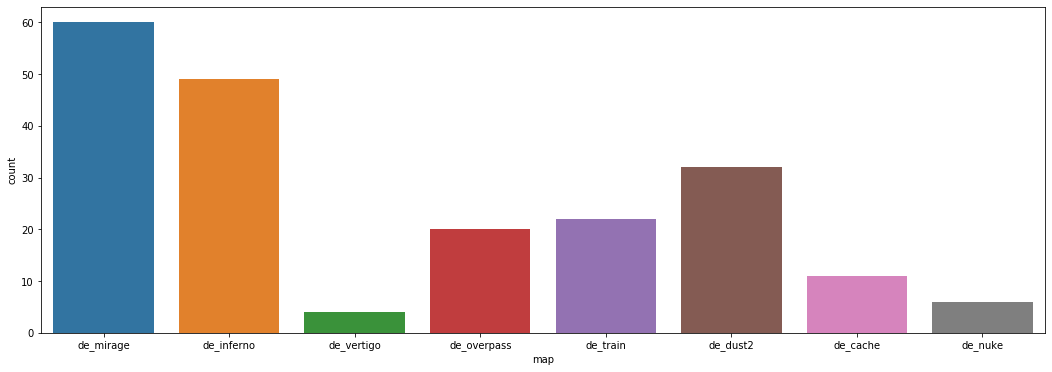

In [930]:
maps = ['de_train', 'de_inferno', 'de_mirage', 'de_vertigo', 'de_nuke', 'de_overpass', 'de_cache', 'de_dust2']
data = data[data['correct_map'].isin(maps)]
data['map'] = data['correct_map']
data.drop(columns=['correct_map'], inplace=True)
plt.figure(figsize=(18,6))
sns.countplot(x='map', data=data)

In [760]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
labels = data['map'].value_counts().index
values = data['map'].value_counts().values

fig = px.pie(data, values=values, names=labels)
fig.show()

In [1624]:
data = data.head(1000)

In [841]:
data['map_categorized']= data['map'].astype('category')
data['map_numeric'] = data['map_categorized'].cat.codes

In [762]:
def get_banned_players():
    return data_players[data_players['status']=='banned']

def blacklist_banned(row,banned_list):
    for player_id in row['players_ids_all']:
        if player_id in banned_list:
            return 1
    return 0

In [844]:
banned_df = get_banned_players()
banned_players_list = banned_df['player_id'].tolist()

start_time = time.time()
data['any_player_banned'] = data.apply(lambda row: blacklist_banned(row, banned_players_list), axis=1)
data = data[data['any_player_banned'] == 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.49755859375 seconds ---


In [225]:
import time
start_time = time.time()
main
print("--- %s seconds ---" % (time.time() - start_time))

--- 251.66560792922974 seconds ---


In [226]:
data['any_player_banned1'].equals(data['any_player_banned3'])


True

In [313]:
def convert_time_to_timestamp(row):
    date_format = "%Y-%m-%dT%H:%M:%SZ" 
    start_time = datetime.strptime(row['start_time'], date_format)
    return start_time

In [931]:
data['timestamp'] = data.apply(lambda row: convert_time_to_timestamp(row), axis=1)
data_stored['timestamp'] = data_stored.apply(lambda row: convert_time_to_timestamp(row), axis=1)

In [167]:
def get_all_players_id(row):
    data_team1 = row['team1']
    data_team2 = row['team2']
    ids = []
    for player in data_team1:
        ids.append(player['id'])
    for player in data_team2:
        ids.append(player['id'])
    return ids

In [934]:
data['players_ids_all'] = data.apply(lambda row: get_all_players_id(row), axis=1)

In [228]:
def get_players_id(row, team):
    data_team = row[team]
    ids = []
    for player in data_team:
        ids.append(player['id'])
    return ids

In [932]:
data_stored['players_ids_team1'] = data_stored.apply(lambda row: get_players_id(row, 'team1'), axis=1)
data_stored['players_ids_team2'] = data_stored.apply(lambda row: get_players_id(row, 'team2'), axis=1)
data_stored['players_ids_all'] = data_stored.apply(lambda row: get_all_players_id(row), axis=1)

In [933]:
data['players_ids_team1'] = data.apply(lambda row: get_players_id(row, 'team1'), axis=1)
data['players_ids_team2'] = data.apply(lambda row: get_players_id(row, 'team2'), axis=1)

In [1194]:
def get_player_match_history(row):
    ids=[]
    for player in itertools.chain(row['team1'], row['team2']):
        ids.append(player['id'])
    start_time = row['timestamp']
    player_id = ids[0]
    print(player_id)
    return data.loc[(data['timestamp'] < start_time)]
#     return data.loc[(data['timestamp'] < start_time) & ((data['players_ids_team1'].str.contains(str(player_id))) | (data['players_ids_team2'].str.contains(str(player_id))))]
#     get all matches where id is in teams1or2 and starttime less than this.starttime order DESC limit 5

In [230]:
def total_matches_on_map(row, team):
    map_played = row['map']
    matches = 0
    ids=[]
    for player in row[team]:
        ids.append(player['id'])
    players_mapstats = data_players.loc[data_players['player_id'].isin(ids), 'map_stats']
    for pms in players_mapstats:
        for comp_map in pms:
            if comp_map['map_name'] == map_played:
                matches += int(comp_map['matches'])
    return matches

def total_matches_on_map2(row, team):
    map_played = row['map']
    matches = 0
    ids = row['players_ids_team1']
    players_mapstats = data_players.loc[data_players['player_id'].isin(ids), 'map_stats']
    for pms in players_mapstats:
        for comp_map in pms:
            if comp_map['map_name'] == map_played:
                matches += int(comp_map['matches'])
    return matches

In [231]:
import time
start_time = time.time()
data['team1_matches_on_map'] = data.apply(lambda row: total_matches_on_map(row, "team1"), axis=1)
print("--- %s seconds ---" % (time.time() - start_time))

# start_time = time.time()
# data['team1_matches_on_map2'] = data.apply(lambda row: total_matches_on_map2(row, "team1"), axis=1)
# print("--- %s seconds ---" % (time.time() - start_time))

--- 246.1485207080841 seconds ---


In [233]:
data['any_player_banned1'].equals(data['team1_matches_on_map'])

True

In [846]:
data['team1_matches_on_map'] = data.apply(lambda row: total_matches_on_map(row, "team1"), axis=1)
data['team2_matches_on_map'] = data.apply(lambda row: total_matches_on_map(row, "team2"), axis=1)

In [287]:
def weighted_winrate_on_map(row, team):
    map_played = row['map']
    matches, win_rate = [], []
    team_data = row[team]
    
    ids=[]
    for player in row[team]:
        ids.append(player['id'])
    players_mapstats = data_players.loc[data_players['player_id'].isin(ids), 'map_stats']
    
    
    for pms in players_mapstats:
        for comp_map in pms:
            if comp_map['map_name'] == map_played:
                matches.append(int(comp_map['matches']))
                win_rate.append(int(comp_map['win_rate']))
    total_matches = sum(matches)
    weighted_win_rate = 0
    
    for i in range(len(win_rate)):
        weighted_win_rate += matches[i]/total_matches * win_rate[i]
    return weighted_win_rate
        

In [847]:
data.head()

,_id,match_id,team1,team2,start_time,map,parties,winner,scoreboard,previous_five,map_categorized,map_numeric,players_ids_team1,players_ids_team2,players_ids_all,any_player_banned,timestamp,team1_matches_on_map,team2_matches_on_map
0,5defd34c44fe901565fe77f3,1-427cfc7e-579a-4d9f-8fbc-f31066d85992,[{'id': '7565eb27-bb23-404e-b89b-f96e3c1c9971'...,[{'id': '46cf4dd5-6135-492b-b076-77701702dadb'...,2019-10-21T02:41:24Z,de_train,{'465e9445-9507-4087-810d-7a61dceeaed9': ['46c...,faction2,[{'player_id': '7565eb27-bb23-404e-b89b-f96e3c...,NaN,de_train,6,"[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67...","[46cf4dd5-6135-492b-b076-77701702dadb, 7529912...","[7565eb27-bb23-404e-b89b-f96e3c1c9971, 7b2fc67...",0,2019-10-21 02:41:24,516,692
1,5defd34f44fe901565fe77fa,1-ebdbc6ae-3509-4d16-8e3a-21f4843fe76b,[{'id': '548b90d6-d081-4461-b157-5efdaef032b2'...,[{'id': '72b7dc0b-d3c4-4935-afcd-d383c2770e94'...,2019-10-21T01:35:53Z,de_train,{'17973219-7e53-4ea7-8382-171df8bef43a': ['548...,faction2,[{'player_id': '548b90d6-d081-4461-b157-5efdae...,NaN,de_train,6,"[548b90d6-d081-4461-b157-5efdaef032b2, bf500b8...","[72b7dc0b-d3c4-4935-afcd-d383c2770e94, 7529912...","[548b90d6-d081-4461-b157-5efdaef032b2, bf500b8...",0,2019-10-21 01:35:53,163,681
2,5defd35044fe901565fe77fd,1-fb3266e6-a519-483f-83bd-5d3a80fc4447,[{'id': '06704697-900f-44ed-8f59-335a3cfce489'...,[{'id': '72b7dc0b-d3c4-4935-afcd-d383c2770e94'...,2019-10-21T00:57:55Z,de_inferno,{'465e9445-9507-4087-810d-7a61dceeaed9': ['72b...,faction2,[{'player_id': '06704697-900f-44ed-8f59-335a3c...,NaN,de_inferno,2,"[06704697-900f-44ed-8f59-335a3cfce489, 6d52239...","[72b7dc0b-d3c4-4935-afcd-d383c2770e94, 7529912...","[06704697-900f-44ed-8f59-335a3cfce489, 6d52239...",0,2019-10-21 00:57:55,387,1298
3,5defd35244fe901565fe7804,1-326d57d7-e5bc-427f-a1d7-c113eec6db65,[{'id': '75299121-de1b-4877-90c2-14445d80da34'...,[{'id': '00c5d9f2-3b39-4128-b011-c99cc8c0eaa7'...,2019-10-20T03:27:53Z,de_mirage,{'24638a22-5f50-4d37-9048-ceb4078c0d05': ['752...,faction2,[{'player_id': '75299121-de1b-4877-90c2-14445d...,NaN,de_mirage,3,"[75299121-de1b-4877-90c2-14445d80da34, 9108aeb...","[00c5d9f2-3b39-4128-b011-c99cc8c0eaa7, 0774758...","[75299121-de1b-4877-90c2-14445d80da34, 9108aeb...",0,2019-10-20 03:27:53,2411,4212
4,5defd35544fe901565fe780e,1-8c3461f9-e2b7-40d9-a3cd-2da4989ffd24,[{'id': '03d8c8a0-8aac-437f-aeeb-912653816033'...,[{'id': '1602f9f7-0211-45f7-b750-57e6bcd6c380'...,2019-10-19T00:58:21Z,de_mirage,{'369597f7-32a9-427e-a4bd-b7754386fc2e': ['2bd...,faction1,[{'player_id': '03d8c8a0-8aac-437f-aeeb-912653...,NaN,de_mirage,3,"[03d8c8a0-8aac-437f-aeeb-912653816033, 2382c17...","[1602f9f7-0211-45f7-b750-57e6bcd6c380, 2c4a0f2...","[03d8c8a0-8aac-437f-aeeb-912653816033, 2382c17...",0,2019-10-19 00:58:21,2870,3602


In [848]:
data['team1_weighted_wr_on_map'] = data.apply(lambda row: weighted_winrate_on_map(row, "team1"), axis=1)
data['team2_weighted_wr_on_map'] = data.apply(lambda row: weighted_winrate_on_map(row, "team2"), axis=1)

In [289]:
def weighted_kd_on_map(row, team):
    map_played = row['map']
    matches, kds = [], []
    team_data = row[team]
    
    ids=[]
    for player in row[team]:
        ids.append(player['id'])
    players_mapstats = data_players.loc[data_players['player_id'].isin(ids), 'map_stats']
    
    
    for pms in players_mapstats:
        for comp_map in pms:
            if comp_map['map_name'] == map_played:
                matches.append(int(comp_map['matches']))
                kds.append(float(comp_map['avg_kd']))
    total_matches = sum(matches)
    weighted_kd_rate = 0
    
    for i in range(len(kds)):
        weighted_kd_rate += matches[i]/total_matches * kds[i]
    return weighted_kd_rate

In [849]:
data['team1_weighted_kd_on_map'] = data.apply(lambda row: weighted_kd_on_map(row, "team1"), axis=1)
data['team2_weighted_kd_on_map'] = data.apply(lambda row: weighted_kd_on_map(row, "team2"), axis=1)

In [291]:
def mean_elo(row, team):
    data_team = row[team]
    elos = []
    for player in data_team:
        elos.append(player['elo'])
    return mean(elos)

In [850]:
data['elo_team1'] = data.apply(lambda row: mean_elo(row, "team1"), axis=1)
data['elo_team2'] = data.apply(lambda row: mean_elo(row, "team2"), axis=1)

In [293]:
def non_free_memberships(row, team):
    memberships=0
    for player in row[team]:
        membship = player['membership']
        if membship != ['free']:
            memberships +=1
    return memberships

In [851]:
data['memberships_team1'] = data.apply(lambda row: non_free_memberships(row, 'team1'), axis=1)
data['memberships_team2'] = data.apply(lambda row: non_free_memberships(row, 'team2'), axis=1)

In [295]:
def num_solo_players(row, team):
    ids_team = get_players_id(row, team)
    num_solo_players = 0
    if row['parties'] == []:
        return 0
    for keys,values in row["parties"].items():
        first_player_team = values[0]
        if first_player_team in ids_team:
            if len(values) == 1:
                num_solo_players +=1
    return num_solo_players

In [852]:
data['solo_players1'] = data.apply(lambda row: num_solo_players(row, "team1"), axis=1)
data['solo_players2'] = data.apply(lambda row: num_solo_players(row, "team2"), axis=1)

In [1298]:
data.iloc[0]['parties']

{'465e9445-9507-4087-810d-7a61dceeaed9': ['46cf4dd5-6135-492b-b076-77701702dadb',
  '75299121-de1b-4877-90c2-14445d80da34',
  '9108aeb7-b586-4308-a00d-1f0f3ec4a3bd',
  'b2676472-68cb-4600-864a-2fc9f5a2a962',
  'dbe8b41f-e16e-4c42-ba15-c80089f4836c'],
 '58c5388f-5d5f-4d4b-af8d-76c7dc871d6b': ['58c5388f-5d5f-4d4b-af8d-76c7dc871d6b'],
 'fa1015eb-279d-40a1-b628-9252e747add6': ['03cedfb6-bb14-4839-a06d-d85f9240d9bd',
  'ce65e3ca-aadb-4443-9029-0f3f538651ed'],
 'fb990e39-687a-4f82-b87e-5af456b19c19': ['7565eb27-bb23-404e-b89b-f96e3c1c9971',
  '7b2fc67e-cf9e-42f9-ac3d-37e27a1f0afa']}

In [ ]:
def num_parties(row, team):
    ids_team = get_players_id(row, team)
    num_parties = 0
#     if row['parties'] == []:
#         return 1
    for keys,values in row["parties"].items():
        result =  all(player in x  for player in values)
    return num_parties

In [297]:
def count_matches_party(data, party):
    searched_playerid = set(party)
    isplayer = searched_playerid.issubset

    matches_party = 0
    for index, row in data.iterrows():
        if row['parties'] == []:
            continue
        for keys,values in row["parties"].items():
            if isplayer(values):
                matches_party += 1
    return matches_party
        

In [309]:
def count_all_parties_match(row, team):
    team_ids = 'players_ids_team1' if team=='team1' else 'players_ids_team2'
    matches_all_parties = 0
    if row['parties'] == []:
        return 0
    for keys,values in row["parties"].items():
        if len(values) == 1:
            continue
        first_player_team = values[0]
        if first_player_team in row[team_ids]:
            matches_all_parties = matches_all_parties + count_matches_party(data, values)*len(values)
    return matches_all_parties

In [853]:
data['matches_all_parties1'] = data.apply(lambda row: count_all_parties_match(row, "team1"), axis=1)
data['matches_all_parties2'] = data.apply(lambda row: count_all_parties_match(row, "team2"), axis=1)


KeyboardInterrupt



In [1109]:
def get_current_team_winstreak(row, team):
    formatted_team = 'players_ids_team1' if team=='team1' else 'players_ids_team2'
    wins_last_five_matches = 0
    start_time = row['timestamp']
    for player in row[formatted_team]:
        last_matches = data_stored[[player in x for x in data_stored['players_ids_all']]]
        last_matches = last_matches[last_matches['timestamp'] <start_time]
        last_matches = last_matches.sort_values(by=['timestamp'], ascending=False).head(5)
        for _,previous_match in last_matches.iterrows():
            if player in previous_match['players_ids_team1']:
                if previous_match['winner'] == 'faction1':
                    wins_last_five_matches +=1
            if player in previous_match['players_ids_team2']:
                if previous_match['winner'] == 'faction2':
                    wins_last_five_matches +=1
    
    return wins_last_five_matches


def get_current_team_winstreak2(row, team):
    formatted_team = 'players_ids_team1' if team=='team1' else 'players_ids_team2'
    wins_last_five_matches = 0
    start_time = row['timestamp']
    last_matches = data_stored[data_stored['timestamp'] <start_time]
    for player in row[formatted_team]:
        counter = 0
        last_matches_specific = last_matches[[player in x for x in last_matches['players_ids_all']]]
        for _,previous_match in last_matches_specific.iterrows():
            if player in previous_match['players_ids_team1']:
                counter +=1
                if previous_match['winner'] == 'faction1':
                    wins_last_five_matches +=1
            if player in previous_match['players_ids_team2']:
                counter +=1
                if previous_match['winner'] == 'faction2':
                    wins_last_five_matches +=1
            if counter == 5:
                break
    
    return wins_last_five_matches

def get_current_team_winstreak3(row, team):
    formatted_team = 'players_ids_team1' if team=='team1' else 'players_ids_team2'
    wins_last_five_matches = 0
    start_time = row['timestamp']
    one_week_before = start_time - datetime.timedelta(days=7)
    last_matches = data_stored[(data_stored['timestamp'] <start_time) & (data_stored['timestamp']>=one_week_before)]
    for player in row[formatted_team]:
        last_matches_specific = last_matches[[player in x for x in last_matches['players_ids_all']]]
        if last_matches_specific.empty:
            continue
        only_lm = last_matches_specific[['players_ids_team1', 'players_ids_team2', 'winner']].head(5)
        player_isin_team1 = only_lm[[player in x for x in only_lm['players_ids_team1']]]
        player_isin_team2 = only_lm[[player in x for x in only_lm['players_ids_team2']]]
        wins_last_five_matches += len(player_isin_team1[player_isin_team1['winner']=='faction1']) 
        wins_last_five_matches += len(player_isin_team2[player_isin_team2['winner']=='faction2'])
        
        #get past 5 matches in the past 7 days and compute avg win_rate, avg_kd weighted by the number of matches
    return wins_last_five_matches

In [440]:
wins = get_current_team_winstreak(data.iloc[0], 'team1')
print(wins)
#REMove matches where player data is not available( profile not found)

59


In [1025]:
data[['9caaa547-ed13-498f-afb5-f16515dd7dfb' in x for x in data['players_ids_all']]]

,_id,match_id,team1,team2,start_time,map,parties,winner,scoreboard,previous_five,timestamp,players_ids_team1,players_ids_team2,players_ids_all,winstreak_last5_team1,winstreak_last5_team1_2
36,5defd3b744fe901565fe78fb,1-b19acbf2-86d6-481b-b882-1c3197430a1d,[{'id': '9caaa547-ed13-498f-afb5-f16515dd7dfb'...,[{'id': '02b0b64c-911e-4ca9-9c80-36649924bbb5'...,2019-08-15T04:08:05Z,de_mirage,{'02b0b64c-911e-4ca9-9c80-36649924bbb5': ['02b...,faction2,[{'player_id': '9caaa547-ed13-498f-afb5-f16515...,ok,2019-08-15 04:08:05,"[9caaa547-ed13-498f-afb5-f16515dd7dfb, a0be3d1...","[02b0b64c-911e-4ca9-9c80-36649924bbb5, 6ff2d57...","[9caaa547-ed13-498f-afb5-f16515dd7dfb, a0be3d1...",2,2


In [1040]:
# POSSIBLE IMPROVEMENT FOR TIME ANALYSIS: SORT BY TIMESTAMP
data_stored = data_stored.sort_values(by=['timestamp'], ascending=False)
data_stored.head()

,_id,match_id,team1,team2,start_time,map,parties,winner,scoreboard,previous_five,timestamp,players_ids_team1,players_ids_team2,players_ids_all
44973,5df446b1c82e39310479f1eb,1-84b682af-aae9-4bd7-b90f-836621a446c3,[{'id': '2ee167ac-2250-452a-b055-61b9e131f956'...,[{'id': '06665368-24d2-459d-8ac0-eef55be93c5c'...,2019-12-14T01:48:50Z,[de_train],{'06665368-24d2-459d-8ac0-eef55be93c5c': ['066...,faction2,[{'player_id': '2ee167ac-2250-452a-b055-61b9e1...,NaN,2019-12-14 01:48:50,"[2ee167ac-2250-452a-b055-61b9e131f956, eb7661e...","[06665368-24d2-459d-8ac0-eef55be93c5c, 5100b02...","[2ee167ac-2250-452a-b055-61b9e131f956, eb7661e..."
44934,5df4462bc82e39310479f198,1-ff3bacd2-cf6b-497d-8fde-f69b40f40528,[{'id': 'd5cbfff0-86c8-4ea4-9a55-c70870a242f0'...,[{'id': 'c379a382-e6ac-41e1-b824-5ae1824a30ad'...,2019-12-14T01:37:05Z,[de_inferno],{'06677932-1b17-4d4e-84bd-878fa4a66b31': ['b62...,faction1,[{'player_id': 'd5cbfff0-86c8-4ea4-9a55-c70870...,NaN,2019-12-14 01:37:05,"[d5cbfff0-86c8-4ea4-9a55-c70870a242f0, d62fd7f...","[c379a382-e6ac-41e1-b824-5ae1824a30ad, e1203d1...","[d5cbfff0-86c8-4ea4-9a55-c70870a242f0, d62fd7f..."
45081,5df44985c82e39310479f32d,1-9c45d12f-afcf-4f5d-aef5-4036e7381300,[{'id': '2b4ae101-8347-4db0-8782-37c27f25c61c'...,[{'id': '18cdd6be-83f4-4ca1-90e1-38a11b4c3952'...,2019-12-14T01:15:43Z,[de_mirage],{'2ade238c-1202-4dd9-b696-7eab79665851': ['18c...,faction1,[{'player_id': '2b4ae101-8347-4db0-8782-37c27f...,NaN,2019-12-14 01:15:43,"[2b4ae101-8347-4db0-8782-37c27f25c61c, 6ca00f4...","[18cdd6be-83f4-4ca1-90e1-38a11b4c3952, 22f74d7...","[2b4ae101-8347-4db0-8782-37c27f25c61c, 6ca00f4..."
44915,5df445e7c82e39310479f169,1-e9bfacfd-4da2-4131-bc53-350ef2a03272,[{'id': '7637435d-8ee3-482e-bc77-0c5279308971'...,[{'id': '9e7320b6-8d2e-46b7-8ffb-96abcfbbfc18'...,2019-12-14T01:01:43Z,[],{'7637435d-8ee3-482e-bc77-0c5279308971': ['763...,faction2,[{'player_id': '7637435d-8ee3-482e-bc77-0c5279...,NaN,2019-12-14 01:01:43,[7637435d-8ee3-482e-bc77-0c5279308971],[9e7320b6-8d2e-46b7-8ffb-96abcfbbfc18],"[7637435d-8ee3-482e-bc77-0c5279308971, 9e7320b..."
44689,5df440fec82e39310479edc2,1-a36be726-b912-438a-9b2e-4f2d42a82ec1,[{'id': '1faac095-8d91-4a3e-8eda-f832f367d9c5'...,[{'id': '911599e4-6056-440e-b7e2-c9948a9370ab'...,2019-12-14T01:01:42Z,[de_mirage],{'2aca4b2f-b9b8-47ac-82bb-d7ea24966466': ['1fa...,faction1,[{'player_id': '1faac095-8d91-4a3e-8eda-f832f3...,NaN,2019-12-14 01:01:42,"[1faac095-8d91-4a3e-8eda-f832f367d9c5, 4bdf384...","[911599e4-6056-440e-b7e2-c9948a9370ab, 9c37745...","[1faac095-8d91-4a3e-8eda-f832f367d9c5, 4bdf384..."


In [1095]:
# start_time = time.time()
# data['winstreak_last5_team1'] = data.apply(lambda row: get_current_team_winstreak(row, 'team1'), axis=1)
# print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
data['winstreak_last5_team1_2'] = data.apply(lambda row: get_current_team_winstreak3(row, 'team1'), axis=1)
# print(get_current_team_winstreak2(data.iloc[2], 'team1'))
print("--- %s seconds ---" % (time.time() - start_time))

--- 5.58146858215332 seconds ---


In [1096]:
data.head(10)

,_id,match_id,team1,team2,start_time,map,parties,winner,scoreboard,previous_five,timestamp,players_ids_team1,players_ids_team2,players_ids_all,winstreak_last5_team1,winstreak_last5_team1_2
36,5defd3b744fe901565fe78fb,1-b19acbf2-86d6-481b-b882-1c3197430a1d,[{'id': '9caaa547-ed13-498f-afb5-f16515dd7dfb'...,[{'id': '02b0b64c-911e-4ca9-9c80-36649924bbb5'...,2019-08-15T04:08:05Z,de_mirage,{'02b0b64c-911e-4ca9-9c80-36649924bbb5': ['02b...,faction2,[{'player_id': '9caaa547-ed13-498f-afb5-f16515...,ok,2019-08-15 04:08:05,"[9caaa547-ed13-498f-afb5-f16515dd7dfb, a0be3d1...","[02b0b64c-911e-4ca9-9c80-36649924bbb5, 6ff2d57...","[9caaa547-ed13-498f-afb5-f16515dd7dfb, a0be3d1...",2,1
780,5defe15644fe901565fe8de7,1-7dec0393-2c93-42c2-a3ea-ee5d42e711b5,[{'id': '0ed67349-151f-4757-8aa2-272665978061'...,[{'id': '62337afb-4c6f-4ae5-98af-4ca6aba173dc'...,2019-08-22T18:00:41Z,de_inferno,{'30d1a102-43e9-47c5-92d6-8bc5eebed78f': ['0ed...,faction1,[{'player_id': '0ed67349-151f-4757-8aa2-272665...,ok,2019-08-22 18:00:41,"[0ed67349-151f-4757-8aa2-272665978061, 2e88f31...","[62337afb-4c6f-4ae5-98af-4ca6aba173dc, 64a7da9...","[0ed67349-151f-4757-8aa2-272665978061, 2e88f31...",0,0
2058,5df0022cd2ab3f93747a90b3,1-4cef8b4f-2d3a-45b9-9e8c-ea711167f128,[{'id': '609531ec-ef1f-4f41-b009-cd0289be4b24'...,[{'id': 'bf4c07a3-0a44-4f89-90cb-b67812ec17b1'...,2019-05-15T02:24:02Z,de_vertigo,{'c7859ce6-40bb-4fa8-b002-c305d6205bc6': ['c78...,faction1,[{'player_id': '609531ec-ef1f-4f41-b009-cd0289...,ok,2019-05-15 02:24:02,"[609531ec-ef1f-4f41-b009-cd0289be4b24, dbfee11...","[bf4c07a3-0a44-4f89-90cb-b67812ec17b1, 487c465...","[609531ec-ef1f-4f41-b009-cd0289be4b24, dbfee11...",9,8
5308,5df04974d2ab3f93747adf70,1-33eac6d0-b620-4623-a7e9-bd3194b26566,[{'id': '000a9b86-cbd6-41d7-bd49-d3dcf23e4558'...,[{'id': '23575034-7f51-47ed-b708-0211b3e0215f'...,2019-11-09T12:17:15Z,de_overpass,{'35f20aa7-cafd-4253-bee8-89af34350479': ['35f...,faction2,[{'player_id': '000a9b86-cbd6-41d7-bd49-d3dcf2...,ok,2019-11-09 12:17:15,"[000a9b86-cbd6-41d7-bd49-d3dcf23e4558, 4115dbb...","[23575034-7f51-47ed-b708-0211b3e0215f, 4c8186c...","[000a9b86-cbd6-41d7-bd49-d3dcf23e4558, 4115dbb...",4,3
5573,5df04b8cd2ab3f93747ae525,1-6cb7775a-633f-4e6a-a486-1ca86148e7a6,[{'id': '1a6bc4cd-564d-40a3-9b2b-8fac753fd723'...,[{'id': '5a610f4b-f8f9-4d1c-85cd-b0faee08ac85'...,2019-11-29T22:20:01Z,de_train,{'2f4ec3b7-4d7a-4389-8149-38e98e645521': ['2f4...,faction1,[{'player_id': '1a6bc4cd-564d-40a3-9b2b-8fac75...,ok,2019-11-29 22:20:01,"[1a6bc4cd-564d-40a3-9b2b-8fac753fd723, 3c5068d...","[5a610f4b-f8f9-4d1c-85cd-b0faee08ac85, 05ef5f1...","[1a6bc4cd-564d-40a3-9b2b-8fac753fd723, 3c5068d...",2,0
5590,5df04bbcd2ab3f93747ae5b3,1-71522565-5f6c-41e7-9e17-a40c5ef1849d,[{'id': 'd394c1e0-6d68-41bc-a489-74c7679e45cb'...,[{'id': '3485396f-b1d4-4c83-831f-780ea38ad17b'...,2019-11-24T20:39:55Z,de_mirage,{'5ade1b87-405c-4608-b3b9-054ac1bbc7aa': ['0f4...,faction2,[{'player_id': 'd394c1e0-6d68-41bc-a489-74c767...,ok,2019-11-24 20:39:55,"[d394c1e0-6d68-41bc-a489-74c7679e45cb, 0f4ff6a...","[3485396f-b1d4-4c83-831f-780ea38ad17b, 51ec434...","[d394c1e0-6d68-41bc-a489-74c7679e45cb, 0f4ff6a...",1,1
5707,5df04d00d2ab3f93747ae945,1-bda17aab-3e29-448c-966c-0c43e5ca465e,[{'id': '044d242d-2819-41d1-b22f-f416414653dd'...,[{'id': 'b224daf0-f32d-488c-aab6-f40f5723a358'...,2019-09-11T21:34:31Z,de_inferno,{'15ec0d59-5c69-4247-bd46-32accb81a099': ['b22...,faction2,[{'player_id': '044d242d-2819-41d1-b22f-f41641...,ok,2019-09-11 21:34:31,"[044d242d-2819-41d1-b22f-f416414653dd, 0699002...","[b224daf0-f32d-488c-aab6-f40f5723a358, bc762f0...","[044d242d-2819-41d1-b22f-f416414653dd, 0699002...",0,0
6781,5df0562ad2ab3f93747b0304,1-38709218-346e-4ab0-8101-d543fbbc0fbd,[{'id': '33b1786f-8503-47e4-8d8e-1ed559a25c4a'...,[{'id': 'f6e522d8-4fc6-43ef-996f-20387f5cf77a'...,2019-08-26T20:24:41Z,de_mirage,{'2e46e78b-0308-4944-9aa6-2cb5c5783797': ['2e4...,faction1,[{'player_id': '33b1786f-8503-47e4-8d8e-1ed559...,ok,2019-08-26 20:24:41,"[33b1786f-8503-47e4-8d8e-1ed559a2

In [1104]:
for p in data[data['match_id'] =='1-4bb02248-42de-4778-8e88-8364400b16e6']['team1']:
    print(p)

[{'id': '731d2e50-adc2-45c2-9740-1bf463e35257', 'elo': 2097, 'membership': ['csgo']}, {'id': '90cead5c-f47f-4573-8786-6e10c8963cf4', 'elo': 2175, 'membership': ['unlimited']}, {'id': '412837f9-0e54-4a34-8578-d3c98c6d681c', 'elo': 2091, 'membership': ['premium']}, {'id': 'd9d4b49f-0dc2-4dab-9f5a-9a2b1bc26984', 'elo': 1766, 'membership': ['csgo']}, {'id': 'e5b855bd-3dbc-4928-a216-241d615b431b', 'elo': 2683, 'membership': ['csgo']}]


In [1108]:
curs = collection_players.find({"player_id": '412837f9-0e54-4a34-8578-d3c98c6d681c'})
for doc in curs:
    pprint(doc)

{'_id': ObjectId('5df05b43d2ab3f93747b107e'),
 'avg_hs': '46',
 'avg_kd': '1.03',
 'map_stats': [{'avg_kd': '0.89',
                'avg_kr': '0.54',
                'map_name': 'de_cache',
                'matches': '7',
                'win_rate': '86'},
               {'avg_kd': '0.77',
                'avg_kr': '0.56',
                'map_name': 'de_nuke',
                'matches': '5',
                'win_rate': '80'},
               {'avg_kd': '0.81',
                'avg_kr': '0.62',
                'map_name': 'de_vertigo',
                'matches': '5',
                'win_rate': '40'},
               {'avg_kd': '1.05',
                'avg_kr': '0.71',
                'map_name': 'de_inferno',
                'matches': '24',
                'win_rate': '50'},
               {'avg_kd': '0.79',
                'avg_kr': '0.56',
                'map_name': 'de_train',
                'matches': '14',
                'win_rate': '50'},
               {'avg_kd': '1.13',
    

In [776]:
data['winstreak_last5_team1'] = data.apply(lambda row: get_current_team_winstreak(row, "team1"), axis=1)
data['winstreak_last5_team2'] = data.apply(lambda row: get_current_team_winstreak(row, "team2"), axis=1)

In [1620]:
party = ['72b7dc0b-d3c4-4935-afcd-d383c2770e94',
  '75299121-de1b-4877-90c2-14445d80da34',
  '9108aeb7-b586-4308-a00d-1f0f3ec4a3bd',
  'b2676472-68cb-4600-864a-2fc9f5a2a962',
  'dbe8b41f-e16e-4c42-ba15-c80089f4836c']


matches = 0
print(count_matches_party(data, party))


2


In [ ]:
def split_parties(row, team):

In [300]:
def num_parties(row, team):
    ids_team = get_players_id(row, team)
    num_parties = 0
    if row['parties'] == []:
        return 1
    for keys,values in row["parties"].items():
        first_player_team = values[0]
        if first_player_team in ids_team:
            num_parties+=1
    return num_parties

In [857]:
data['num_parties1'] = data.apply(lambda row: num_parties(row, "team1"), axis=1)
data['num_parties2'] = data.apply(lambda row: num_parties(row, "team2"), axis=1)

In [1242]:
# delta features is the way to go
data['dif_elo'] = data['elo_team1']-data['elo_team2']
data['dif_weighted_wr'] = data['team1_weighted_wr_on_map']-data['team2_weighted_wr_on_map']
data['dif_matches'] = data['team1_matches_on_map']-data['team2_matches_on_map']
data['dif_parties'] = data['parties1']-data['parties2']

In [859]:
data.columns

Index(['_id', 'match_id', 'team1', 'team2', 'start_time', 'map', 'parties',
       'winner', 'scoreboard', 'previous_five', 'map_categorized',
       'map_numeric', 'players_ids_team1', 'players_ids_team2',
       'players_ids_all', 'any_player_banned', 'timestamp',
       'team1_matches_on_map', 'team2_matches_on_map',
       'team1_weighted_wr_on_map', 'team2_weighted_wr_on_map',
       'team1_weighted_kd_on_map', 'team2_weighted_kd_on_map', 'elo_team1',
       'elo_team2', 'memberships_team1', 'memberships_team2', 'solo_players1',
       'solo_players2', 'num_parties1', 'num_parties2'],
      dtype='object')

In [48]:
data_simplified = data[['map_numeric', 'any_player_banned', 'elo_team1', 'elo_team2','winner']]

In [1244]:
data_simplified = data[['dif_elo', 'dif_weighted_wr', 'dif_matches', 'dif_parties', 'winner']]

In [860]:
data_simplified = data[['team1_weighted_kd_on_map', 'team2_weighted_kd_on_map', 'team1_weighted_wr_on_map', 'team2_weighted_wr_on_map', 'team1_matches_on_map', 'team2_matches_on_map', 'elo_team1', 'elo_team2', 'num_parties1', 'num_parties2', 'winner']]

In [778]:
data_simplified = data[['matches_all_parties1', 'matches_all_parties2','winstreak_last5_team1', 'winstreak_last5_team2', 'map_numeric', 'team1_weighted_kd_on_map', 'team2_weighted_kd_on_map', 'memberships_team1', 'memberships_team1','solo_players1', 'solo_players2', 'team1_weighted_wr_on_map', 'team2_weighted_wr_on_map', 'team1_matches_on_map', 'team2_matches_on_map', 'elo_team1', 'elo_team2', 'num_parties1', 'num_parties2', 'winner']]

In [861]:
def convert_winner(row):
    convert = 0 if row['winner'] == 'faction1' else 1
    return convert

In [862]:
data_simplified['winner_conv'] = data_simplified.apply(lambda row: convert_winner(row), axis=1)
data_simplified.drop(columns=['winner'], inplace=True)
data_simplified.head()

C:\Users\hmbf1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hmbf1\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,team1_weighted_kd_on_map,team2_weighted_kd_on_map,team1_weighted_wr_on_map,team2_weighted_wr_on_map,team1_matches_on_map,team2_matches_on_map,elo_team1,elo_team2,num_parties1,num_parties2,winner_conv
0,1.107791,1.065968,49.668605,49.559249,516,692,1938.2,1844.6,3,1,1
1,1.119264,1.084787,53.012270,50.148311,163,681,1628.4,1678.0,2,1,1
2,1.251034,1.051972,54.555556,51.221880,387,1298,1644.4,1654.0,2,1,1
3,1.067321,1.187488,50.848196,51.317901,2411,4212,1688.6,1817.6,1,1,1
4,1.155537,1.051180,49.785017,49.250416,2870,3602,2376.6,2520.8,1,2,0


In [863]:
data_simplified.shape

(41265, 11)

In [880]:
X_train, X_test, y_train, y_test = train_test_split(data_simplified.drop(columns=['winner_conv']), data_simplified['winner_conv'], test_size=0.3, random_state=101)

In [881]:
X_train.head()

,team1_weighted_kd_on_map,team2_weighted_kd_on_map,team1_weighted_wr_on_map,team2_weighted_wr_on_map,team1_matches_on_map,team2_matches_on_map,elo_team1,elo_team2,num_parties1,num_parties2
14583,1.217763,1.025000,48.539474,48.455882,76,68,1036.4,1033.6,4,4
36127,1.131863,1.076875,51.708075,45.223958,322,192,1281.4,1246.4,2,1
10335,1.134848,1.182204,55.813452,50.410191,788,785,1316.2,1315.6,3,4
18120,1.071767,1.000727,46.366379,50.187879,232,165,1315.8,1320.0,4,3
16170,1.031426,1.130580,49.584928,54.213720,1725,758,1351.2,1345.0,3,3


In [882]:
rf = RandomForestClassifier(n_estimators=300, random_state=101)

In [883]:
rf = RandomForestClassifier(max_depth=5, max_features=5, min_samples_leaf=4, min_samples_split=25, n_estimators=50)

In [884]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [885]:
rf.score(X_train, y_train)

0.6326467024407132

In [886]:
preds = rf.predict(X_test)

In [887]:
from sklearn.metrics import classification_report, accuracy_score

In [888]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.67      0.65      6286
           1       0.63      0.57      0.60      6094

    accuracy                           0.62     12380
   macro avg       0.62      0.62      0.62     12380
weighted avg       0.62      0.62      0.62     12380



In [889]:
print(accuracy_score(y_test, preds))

0.6231825525040388


In [620]:
importances = rf.feature_importances_

In [610]:
print(importances)

[0.07072673 0.0685252  0.09396498 0.10266018 0.12248874 0.12807552
 0.08842039 0.08279898 0.09201049 0.08772199 0.03130996 0.03129684]


In [829]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [ 4, 5,15],
    'min_samples_split': [10, 12,25],
    'n_estimators': [50, 100, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [830]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   17.6s finished
C:\Users\hmbf1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [831]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [832]:
best_grid = grid_search.best_estimator_


In [833]:
preds = best_grid.predict(X_test)

In [834]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.58      0.29      0.39        72
           1       0.45      0.74      0.56        57

    accuracy                           0.49       129
   macro avg       0.52      0.51      0.47       129
weighted avg       0.53      0.49      0.46       129



In [835]:
print(accuracy_score(y_test, preds))

0.4883720930232558
